# Data Analysis for the King Country House Sales
by Johannes Pfohl

---
What is this notebook about?
About a data science project that bases on the King Country House Sales dataset. 
We will have a look on the factors that have an impact and that have not an impact on house prices in King County, Washington. 
Finally I will give a conclution and outlook for the home sellers and home buyers in this part of the USA.

# Content
I. Import required Packages and the Dataset - our EDA will be based on [KC_House_Sales]( "kc_house_prices/King_County_House_prices_dataset.csv")

II. Data Understanding, Preparation and Munging<sup>1</sup>   
   - Data transforming
   - Data cleaning

III. Exploratory Data Analysis
   - General view over the characteristics
   - Going one by one through the varaiables

IV. Multiple Regression Model

V. Modelling by using Sklearn

VI. Summary

...
<sup>1</sup> Data integraten, data transformation, data reduction, data cleaning

---
# I. Import required Packages and the Dataset

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# to ignore seaborn warnings (nobody likes those)
import warnings
warnings.filterwarnings('ignore')  

plt.style.use('classic')
%matplotlib inline

pd.set_option('display.max_columns', 144)

In [4]:
# Import the King_Country_House_prices_dataset via csv file
df = pd.read_csv('King_County_House_prices_dataset.csv')

In [4]:
# Never a bad idea - Quickly check the number of rows (observations) and columns (features) in the df
df.shape

(21597, 21)

---
# II. Data Understanding, Preparation and Munging

### To get a general understanding of the data - Let us take a look into the data set

In [5]:
# display the first 5 rows of the data set
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
# display the names of all columns
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Remember - We got a markdown file with aditional information for the content in the columns!
(But do not forget, our business stakeholder already left the company. So we can not ask him for further details. That is a pity.)

* **id** - unique identified for a house
* **dateDate** - house was sold
* <span style="color:orange">**pricePrice** -  is prediction target</span>
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

## Data transforming

In [7]:
# Let us check some basic information for the columns (for example the data types)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Notice that the columns `date` and `sqft_basemen` have 'object' as data type.    
Let us take a closer look at those columns.

In [8]:
# Deep dive into the 'object' of date and sqft_basement
df.select_dtypes(include='object').head(5)

,date,sqft_basement
0,10/13/2014,0.0
1,12/9/2014,400.0
2,2/25/2015,0.0
3,12/9/2014,910.0
4,2/18/2015,0.0


We got a date like DD/MM/YYYY and a number like 0.00 but both are defind as 'object' - Mysterious!   
At first we look more into detail at the `date`column. This column tell us the sell-by date of the related house. To work with the `date` column and the data in it we have to transform the data type. We do this with the function: `to_datetype`. By this function we convert the date type into *datetime*.

In [9]:
df.date = pd.to_datetime(df.date)
df.date.head(5)

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [10]:
# To get a full understanding for the period of time of our data we figure out the first and the last date
min = df.date.min()
s_min = min.strftime('%d/%m/%Y')
max = df.date.max()
s_max = max.strftime('%d/%m/%Y')
print("The period of time for KC_House_Prices goes from: " + s_min + " to: " + s_max + ".")

The period of time for KC_House_Prices goes from: 02/05/2014 to: 27/05/2015.


After this we know that we are analyse a timeframe of round about 13 months.   
For furhter and more detailed predictions in the ongoing process we add three columns to our data set. Columns for date, month and year of the sell-by point of time.

In [11]:
date_day = df.date.apply(lambda d: d.day)
date_day.name = 'date_day'

date_month = df.date.apply(lambda d: d.month)
date_month.name = 'date_month'

date_year = df.date.apply(lambda d: d.year)
date_year.name = 'date_year'

df = pd.concat([df, date_day, date_month, date_year], axis = 1)
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_day,date_month,date_year
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,13,10,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,9,12,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,25,2,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,9,12,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,18,2,2015


Alright, we got the date save.   
But we have one more problem column. The column `sqft_basement` still have 'object' as data type.   
Looking at similar columns like `sqft_above` we can asume that `sqft_basement`shoud be a number. By choosing a numeric data type we orientate us on `sqft_living15`, `sqft_lot15`and `sqft_above`. All of those have the data type int64 (integer -9223372036854775808 to 9223372036854775807). That means we will convert `sqft_basement`to the data type int64.   
But before start with that let us check if really each row is filled with a convertible 'object' to int64!

In [12]:
# Check all unique calues for `sqft_basement`
sorted(df.sqft_basement.unique(), reverse=True)

['?',
 '990.0',
 '980.0',
 '970.0',
 '960.0',
 '950.0',
 '946.0',
 '940.0',
 '935.0',
 '930.0',
 '920.0',
 '915.0',
 '910.0',
 '906.0',
 '900.0',
 '90.0',
 '890.0',
 '880.0',
 '875.0',
 '870.0',
 '862.0',
 '861.0',
 '860.0',
 '850.0',
 '840.0',
 '830.0',
 '820.0',
 '810.0',
 '800.0',
 '80.0',
 '792.0',
 '790.0',
 '784.0',
 '780.0',
 '770.0',
 '768.0',
 '760.0',
 '750.0',
 '740.0',
 '730.0',
 '720.0',
 '710.0',
 '704.0',
 '700.0',
 '70.0',
 '690.0',
 '680.0',
 '670.0',
 '666.0',
 '660.0',
 '652.0',
 '650.0',
 '65.0',
 '640.0',
 '630.0',
 '620.0',
 '610.0',
 '602.0',
 '600.0',
 '60.0',
 '590.0',
 '588.0',
 '580.0',
 '570.0',
 '560.0',
 '556.0',
 '550.0',
 '540.0',
 '530.0',
 '520.0',
 '518.0',
 '516.0',
 '515.0',
 '510.0',
 '508.0',
 '506.0',
 '500.0',
 '50.0',
 '490.0',
 '4820.0',
 '480.0',
 '475.0',
 '470.0',
 '460.0',
 '450.0',
 '440.0',
 '435.0',
 '430.0',
 '420.0',
 '417.0',
 '415.0',
 '414.0',
 '4130.0',
 '410.0',
 '400.0',
 '40.0',
 '390.0',
 '380.0',
 '374.0',
 '370.0',
 '360.0',

In [13]:
# Why there is a questionmark'?' in it?
df.sqft_basement.value_counts()['?']

454

Not only one '?' - in total the column includes 454 questionmarks! That simply means that there are in 454 rows no values in for `sqft_basement`.    
Like abovementioned we only can convert the column into int64 if all the 'object' would be kind of a number but that is not the case. Out of this circumstance we change the '?' to NaN and because of NaN can not be an int64 we change our plan and transform the column to float!

In [14]:
# Changing the date type for `sqft_basement`to float
# For ‘coerce’, then invalid parsing will be set as NaN
df.sqft_basement = pd.to_numeric(df.sqft_basement, errors='coerce', downcast='float')
df.sqft_basement.head(10)

0       0.0
1     400.0
2       0.0
3     910.0
4       0.0
5    1530.0
6       NaN
7       0.0
8     730.0
9       0.0
Name: sqft_basement, dtype: float32

## Data cleaning

There are some data missing in our data frame? Yes/No? If yes, who many?

In [15]:
# Calculate who many values are missing in each column and what mean that in percentage.
mis_val = df.isnull().sum().sort_values(ascending=False)
mis_per = round(mis_val / df.shape[0] * 100, 2)

mis_data = pd.concat([mis_val, mis_per], axis=1, keys=['Total', 'Percent'])
mis_data.head(5)

mis_data[mis_data.Total>0]

,Total,Percent
yr_renovated,3842,17.79
waterfront,2376,11.00
sqft_basement,454,2.10
view,63,0.29


Not the result we hoped for but we learn that the columns `yr_renovated`, `waterfront`, `sqft_basement`and `view`have some data missing!

Beginning with `yr_renovated` we will work on a closer look on this.

In [16]:
# Finding out when the houses were renoveted
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

Wow, wow, wow - One or more houses were renoveted at the Nativity!? I do not think so.

In [17]:
# How many houses were renoveted at the Nativity?
df.yr_renovated.value_counts()[0]

17011

I really can not imagin that 17011 houses were renoveted in year 0! So a more reasonable assumption is that those 17011 houses were never renoveted up to now. Based on this assumption we determine a dummy variable.
Also we should keep in mind that some rows in `yr_renovated`are empty.

In [18]:
# Add a column to our data set to see if a house was renovated - YES '1' or NO '0'
renovated = df.yr_renovated.copy()
renovated[renovated > 0] = 1
renovated.name = 'renovated'
 
df = pd.concat([df, renovated], axis=1)
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_day,date_month,date_year,renovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,13,10,2014,0.0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,9,12,2014,1.0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,25,2,2015,NaN
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,9,12,2014,0.0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,18,2,2015,0.0


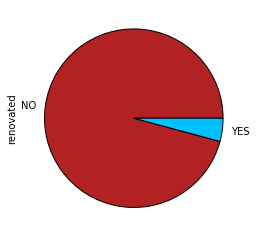

In [19]:
# Graphical view on the distribution of renovated - YES or NO
df.renovated.value_counts().plot(kind='pie', colors=['firebrick','deepskyblue'], labels=['NO','YES']);

Secondly we turn our attention to `waterfront`.

In [20]:
# What is in this column?
df.waterfront.unique()

array([nan,  0.,  1.])

In [21]:
# How often do we have those three elements?
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

So what we can say about the column `waterfront`: We have three different values and we can interpret each of them with a different meaning. Starting with the most meaningful. 1 seems to be the marker that indicades that a house have a waterfront. Regarding 0 and nan we can interpred that the both values have not the same meaning. For our faster analyse we asume that 0 means a house have no waterfront. For the nan values we simply have not the information if a house have a waterfront or not.
Of course it would be possible the calculate for the houses with nan if those have a waterfront or not via the given longitute and latitude. Based on this calculated point we can check if the nearest neighbor have a waterfront or we can check the point on a map.
But considering the climat change, the rising sea level and that human can build whole palm trees with synthesize waterfronts we simply do not know if a house with nan have a waterfront or not and accept this and asume nan means no waterfront

In [6]:
# Changeing all nan to 0 in `waterfront`
df.loc[df.waterfront.isna(), 'waterfront'] = 0
df.waterfront.isna().sum()

0

Let us go on with `sqft_basement` with checking the following hypothesis: The sum of `sqft_living`is the result of add up `sqft_basement` and `sqft_above`.

In [22]:
# Checking the hypothesis
sum_sqft_base_sqft_above = df.sqft_basement + df.sqft_above
sqft_living = df.sqft_living
all(sqft_living[sum_sqft_base_sqft_above.notna()] == sum_sqft_base_sqft_above[sum_sqft_base_sqft_above.notna()])

True

Hypothesis - Confirmed!
After we are shore about this set of facts we can calculate the missing values for `sqft_basement` out of `sqft_living` minus `sqft_above`.

In [23]:
# Calculate the missing `sqft_basement`values and into those into our data set
df.loc[df.sqft_basement.isna(), 'sqft_basement'] =\
    df.sqft_living[df.sqft_basement.isna()] - df.sqft_above[df.sqft_basement.isna()]

Last but not least we have to deal with `view` what mean the house tours.

In [24]:
# What is in it
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [25]:
# Count the unique values for `view`
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

Likly at `waterfront` 0 and nan do not mean the same. 0 easiely means that no house tours took place up to now and for nan we have not an information if zero or more house tours took place. The good thing on the nan values is that they are not even 1% of the overall count. Out of this information let us assume that nan means 0 `view`.

In [26]:
# Changeing all nan to 0 in `view`
df.loc[df.view.isna(), 'view'] = 0
df.view.isna().sum()

0

After we finished the data cleaning as a last step we oversee the still missing data.

In [27]:
# Checking missing values per column
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date_day            0
date_month          0
date_year           0
renovated        3842
dtype: int64

---
# III. Exploratory Data Analysis

## General view over the characteristics

In [28]:
# Overall statistics for King Country House Prices
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_day,date_month,date_year,renovated
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233181,3.409825,7.657915,1788.596842,291.725006,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,15.687457,6.573969,2014.322962,0.041904
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.764673,0.650546,1.173200,827.759761,442.667786,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950,8.634890,3.115061,0.467619,0.200375
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1.000000,1.000000,2014.000000,0.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,8.000000,4.000000,2014.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,16.000000,6.000000,2014.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,23.000000,9.000000,2015.000000,0.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,31.000000,12.000000,2015.000000,1.000000


For a general understanding of all the dependant and independent features relating to the price we do some visualisations!
Therefore we split the data set into four subsets and let us show the scatter plots for each of the subsets with price as banchmark.

### 1. Subset:
* bedroomsNumber -  of Bedrooms/House
* bathroomsNumber -  of bathrooms
* floorsTotal -  floors (levels) in house
* condition - How good the condition is ( Overall )
* grade- overall grade given to the housing unit, based on King County grading system

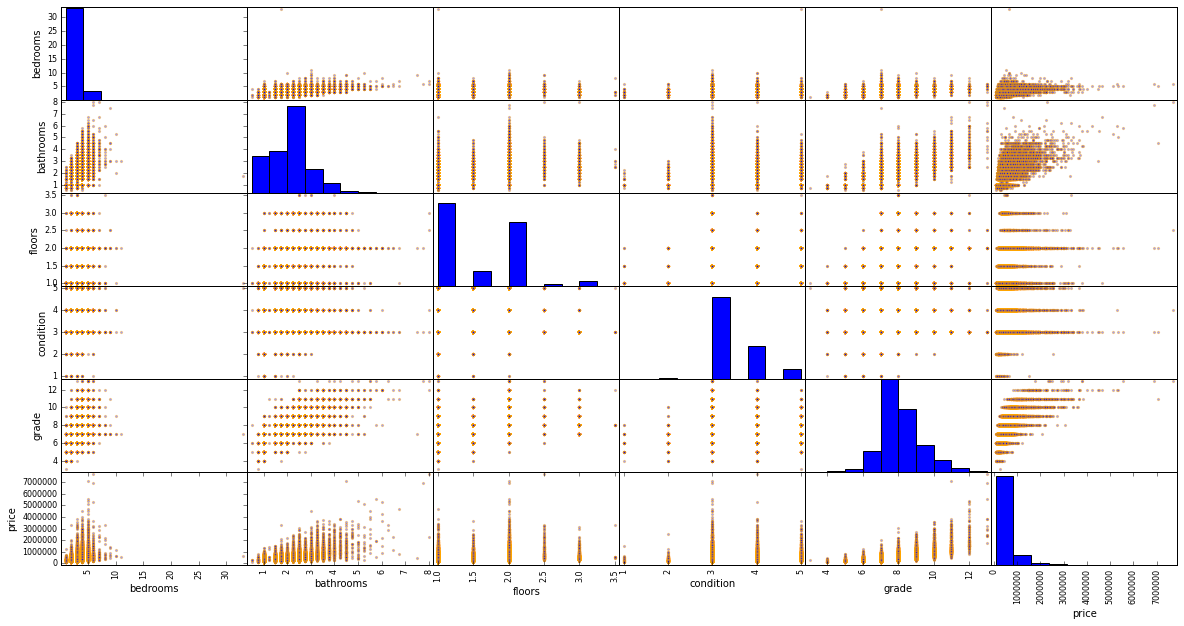

In [29]:
col_subset1 = ['bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'price']
pd.plotting.scatter_matrix(df[col_subset1], figsize=(20, 10), edgecolor='orange', alpha=0.4);

Out of the first visual view there is no linear relationship obvious for `floors` and `price` and for `condition` and `price`.
But will go more into detail in our further analysis.

### 2. Subset:
* sqft_livingsquare -  footage of the home
* sqft_lotsquare -  footage of the lot
* sqft_above - square footage of house apart from basement
* sqft_basement - square footage of the basement

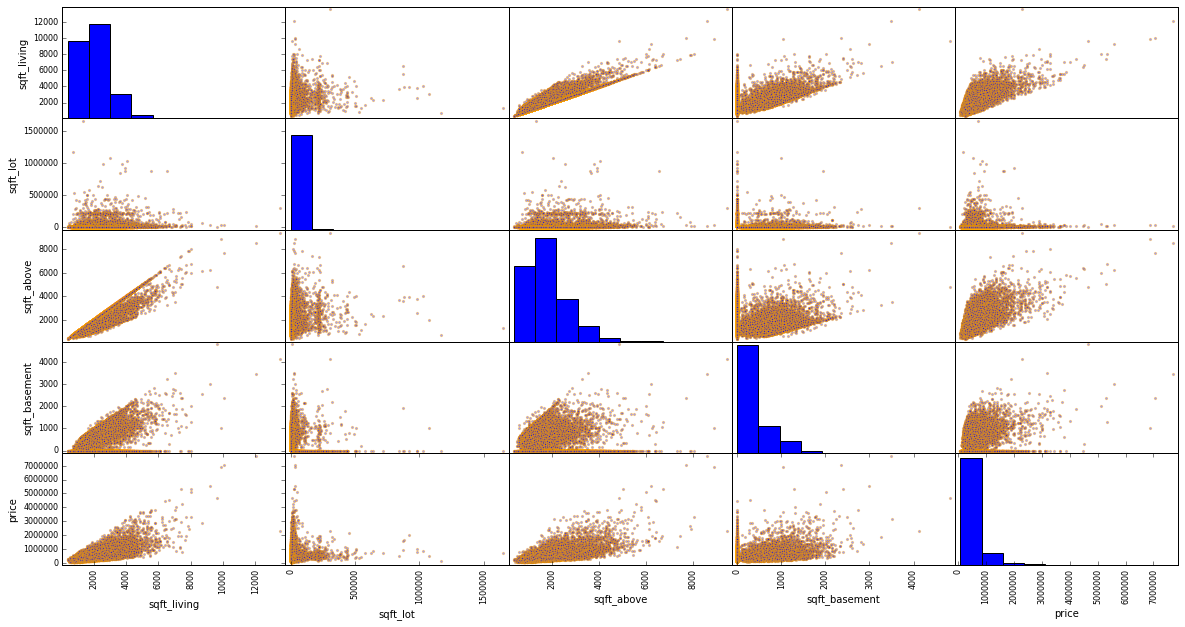

In [30]:
col_subset2 = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'price']
pd.plotting.scatter_matrix(df[col_subset2], figsize=(20, 10), edgecolor='orange', alpha=0.4);

Based on the plot for `sqft_basement` we extrapolate that it would make sense to differentiate between `sqft_basement` = 0 (no basement) and `sqft_basement` > 1 (houses with basement). For this reason we will add a dummy variable that tells us if there is a basement or not later on.

### 3. Subset:
* waterfront - House which has a view to a waterfront
* view - Has been viewed
* yr_built - Built Year
* yr_renovated - Year when house was renovated

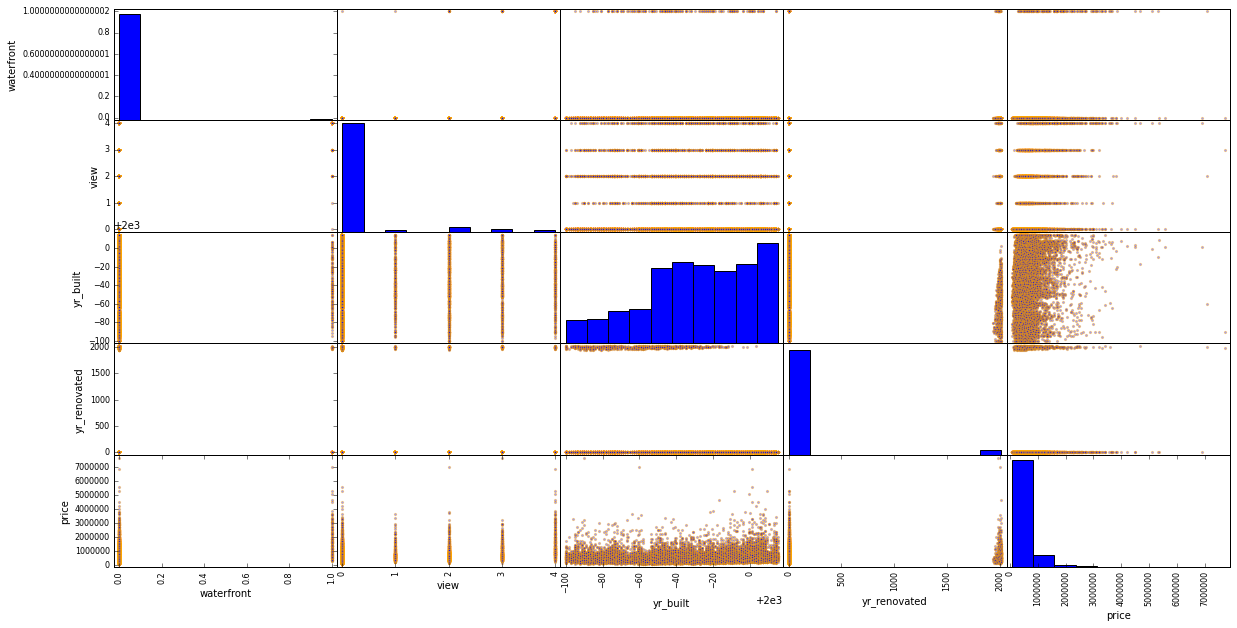

In [31]:
col_subset3 = ['waterfront', 'view', 'yr_built', 'yr_renovated', 'price']
pd.plotting.scatter_matrix(df[col_subset3], figsize=(20, 10), edgecolor='orange', alpha=0.4);

What we can clearly see is that `waterfront`is a categorical variable. Futher it is not applicable that there is a linear relationship between `view` and `price`. Because of that we should also add a dummy variable for `view`.

### 4. Subset:
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors  
* date_month - month the house was sold
* zipcode - zip
* lat - Latitude coordinate
* long - Longitude coordinate

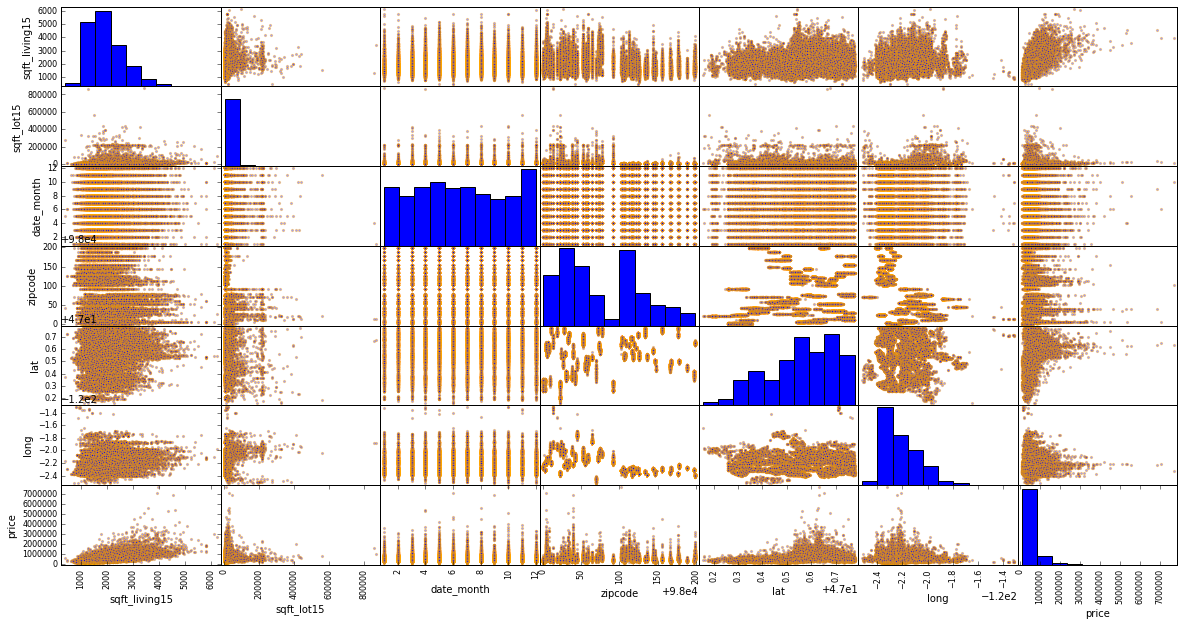

In [32]:
col_subset4 = ['sqft_living15', 'sqft_lot15', 'date_month', 'zipcode', 'lat', 'long', 'price']
pd.plotting.scatter_matrix(df[col_subset4], figsize=(20, 10), edgecolor='orange', alpha=0.4);

Because of the data type of `date_month` and `zipcode` (categorical) we have to insert dummys.

## Going one by one through the varaiables
### Dependent variable: PRICE

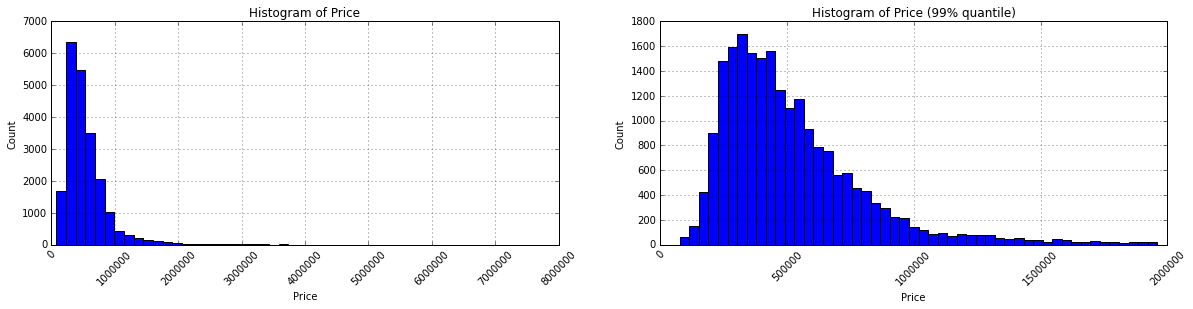

In [33]:
# Histogram for the dependent variable price

plt.subplot(121)
df.price.hist(bins=50, figsize=(20,4))
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.xticks(rotation=45);

plt.subplot(122)
df.price[df.price < df.price.quantile(0.99)].hist(bins=50)
plt.title('Histogram of Price (99% quantile)')
plt.xlabel('Price')
plt.ylabel('Count')
plt.xticks(rotation=45);

## Independent variables
## Bedrooms

No handles with labels found to put in legend.


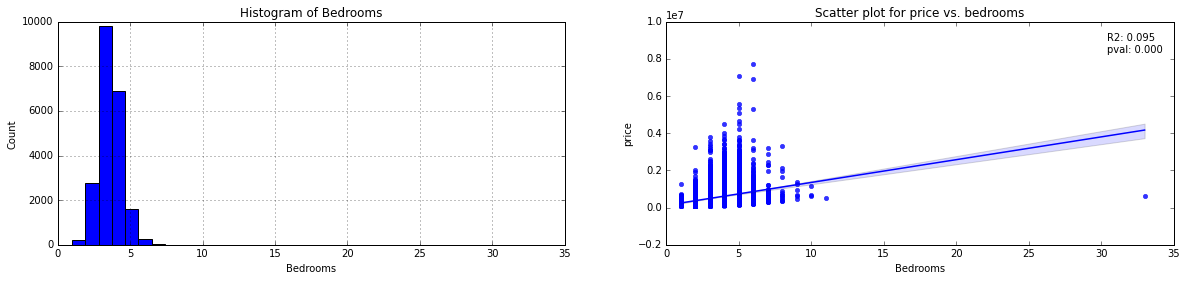

In [34]:
# ploting histogram and scatter plot

plt.subplot(121)
df.bedrooms.hist(bins=35, figsize=(20,4))
plt.title('Histogram of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count');

plt.subplot(122)
r = smf.ols(formula='price ~ bedrooms', data=df).fit()

sns.regplot(x=df.bedrooms, y=df.price)
plt.title('Scatter plot for price vs. bedrooms')
plt.xlabel('Bedrooms')
text = 'R2: {:.3f}\npval: {:.3f}'.format(r.rsquared, r.pvalues[1])
plt.legend(title=text, frameon=False);

Why do we have houses with up to 35 bedrooms? Maybe the house of Bill Gates?   
But for a more fundamental analysis we will drop the outliers!

In [35]:
# Get an understanding for the outlier in bedroom
df.iloc[df.bedrooms.values.argmax()].bedrooms

33

In [36]:
# Get the index row for bedrooms = 33
df.index[df['bedrooms'] == 33]

Int64Index([15856], dtype='int64')

No handles with labels found to put in legend.


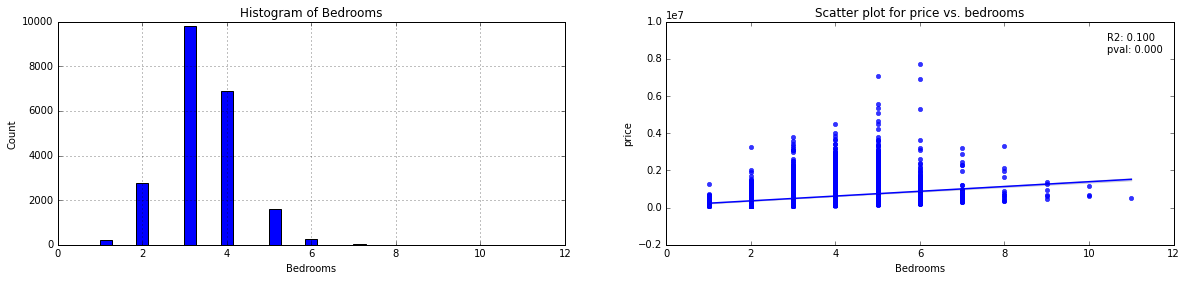

In [37]:
# dropping the outlier
df.drop(index=15856,axis=0, inplace=True)

# have a secount look at our plots, now without the outlier
plt.subplot(121)
df.bedrooms.hist(bins=35, figsize=(20,4))
plt.title('Histogram of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count');

plt.subplot(122)
r = smf.ols(formula='price ~ bedrooms', data=df).fit()

sns.regplot(x=df.bedrooms, y=df.price)
plt.title('Scatter plot for price vs. bedrooms')
plt.xlabel('Bedrooms')
text = 'R2: {:.3f}\npval: {:.3f}'.format(r.rsquared, r.pvalues[1])
plt.legend(title=text, frameon=False);

We can see a slight linear relationship between `bedrooms` and `price`, although it also looks like prices are highest for houses with around 5 to 6 bedrooms and lower for houses with very little or many bedrooms.

In [38]:
# bedrooms as categorical predictor:
smf.ols(formula='price ~ C(bedrooms)', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     257.2
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:43:02   Log-Likelihood:            -3.0616e+05
No. Observations:               21596   AIC:                         6.123e+05
Df Residuals:                   21585   BIC:                         6.124e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          3.182e+05   2.48e+04     12.827      0.000     2.7e+05    3.67e+05
C(bedrooms)[T.2]   8.315e+04   2.57e+04      3.238      0.001    3.28e+04    1.33e+05
C(bedrooms)[T.3]    1.48e+05   2.51e+04      5.908      0.000    9.89e+04    1.97e+05
C(bedrooms)[T.4]   3.173e+05   2.52e+04     12.611      0.000    2.68e+05    3.67e+05
C(bedrooms)[T.5]   4.686e+05   2.63e+04     17.829      0.000    4.17e+05     5.2e+05
C(bedrooms)[T.6]   5.076e+05   3.25e+04     15.597      0.000    4.44e+05    5.71e+05
C(bedrooms)[T.7]   6.332e+05   6.16e+04     10.285      0.000    5.13e+05    7.54e+05
C(bedrooms)[T.8]   7.868e+05   9.95e+04      7.909      0.000    5.92e+05    9.82e+05
C(bedrooms)[T.9]   5.758e+05   1.44e+05      3.999      0.000    2.94e+05    8.58e+05
C(bedrooms)[T.10]  5.018e+05   2.02e+05      2.483      0.013    1.06e+05    8.98e+05
C(bedrooms)[T.11]  2.018e+05   3.48e+05      0.579      0.562   -4.81e+05    8.84e+05
==============================================================================
Omnibus:                    18955.510   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1195850.523
Skew:                           3.946   Prob(JB):                         0.00
Kurtosis:                      38.591   Cond. No.                         171.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# Maybe dummies for bedroom

## Bathrooms

No handles with labels found to put in legend.


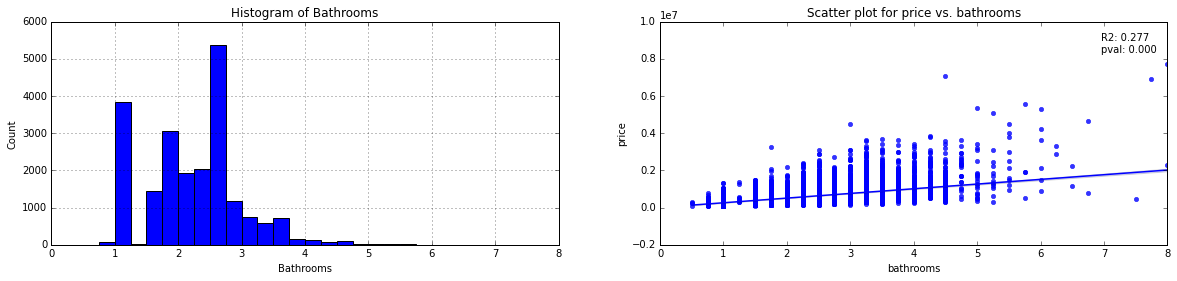

In [40]:
# ploting histogram and scatter plot

plt.subplot(121)
df.bathrooms.hist(bins=30, figsize=(20,4))
plt.title('Histogram of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count');

plt.subplot(122)
r = smf.ols(formula='price ~ bathrooms', data=df).fit()

sns.regplot(x=df.bathrooms, y=df.price)
plt.title('Scatter plot for price vs. bathrooms')
text = 'R2: {:.3f}\npval: {:.3f}\n'.format(r.rsquared, r.pvalues[1])
plt.legend(title=text, frameon=False);

As we can see there is a linear relation between `bedrooms` and `price`.

## Sqft_living

No handles with labels found to put in legend.


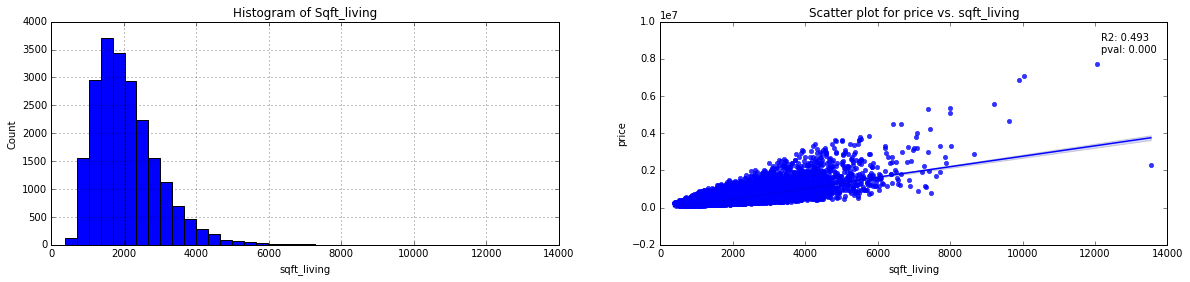

In [41]:
# ploting histogram and scatter plot

plt.subplot(121)
df.sqft_living.hist(bins=40, figsize=(20,4))
plt.title('Histogram of Sqft_living')
plt.xlabel('sqft_living')
plt.ylabel('Count');

plt.subplot(122)
r = smf.ols(formula='price ~ sqft_living', data=df).fit()

sns.regplot(x=df.sqft_living, y=df.price)
plt.title('Scatter plot for price vs. sqft_living')
text = 'R2: {:.3f}\npval: {:.3f}\n'.format(r.rsquared, r.pvalues[1])
plt.legend(title=text, frameon=False);

In [42]:
smf.ols(formula='price ~ sqft_living', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:43:05   Log-Likelihood:            -3.0005e+05
No. Observations:               21596   AIC:                         6.001e+05
Df Residuals:                   21594   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.401e+04   4410.123     -9.980      0.000   -5.27e+04   -3.54e+04
sqft_living   280.8688      1.939    144.820      0.000     277.067     284.670
==============================================================================
Omnibus:                    14801.492   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542642.481
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can see a strong linear relationship between `sqft_living` and `price`. In fact, this feature already explains around 50% of the variance in `price`. <br>

<h2><span style="color:red"> 
Recommendation number ONE for our Stakeholders: </span> Increase the interior living area!</h2>

## Sqft_lot

No handles with labels found to put in legend.


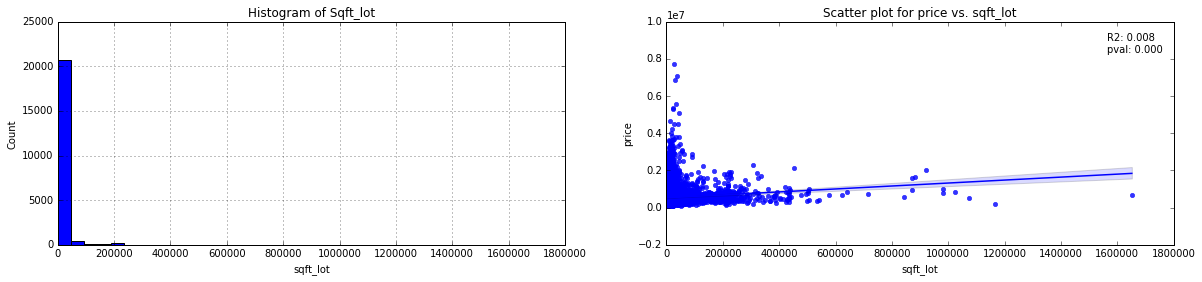

In [43]:
# ploting histogram and scatter plot

plt.subplot(121)
df.sqft_lot.hist(bins=35, figsize=(20,4))
plt.title('Histogram of Sqft_lot')
plt.xlabel('sqft_lot')
plt.ylabel('Count');

plt.subplot(122)
r = smf.ols(formula='price ~ sqft_lot', data=df).fit()

sns.regplot(x=df.sqft_lot, y=df.price)
plt.title('Scatter plot for price vs. sqft_lot')
text = 'R2: {:.3f}\npval: {:.3f}\n'.format(r.rsquared, r.pvalues[1])
plt.legend(title=text, frameon=False);

We see that the distribution of `sqft_lot` is very left-skewed and there is no clear linear relationship with `price`, at least not if we include the whole range of `sqft_lot`. Let us first check the same plots for only the 95%-quantile of this feature (leaving out the 5% with largest values).

No handles with labels found to put in legend.


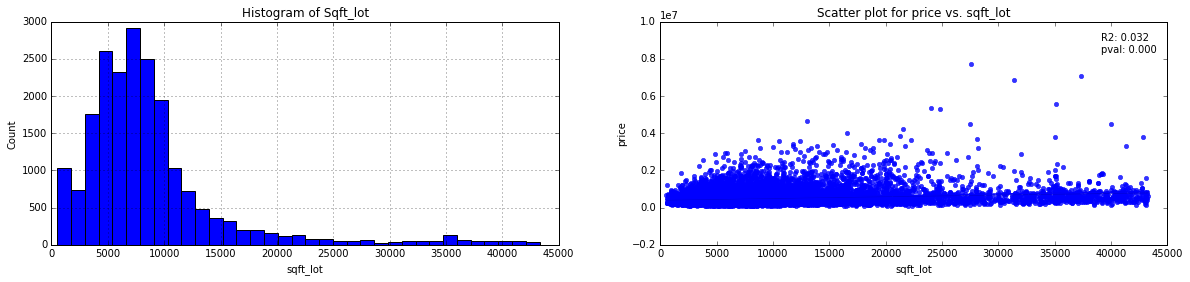

In [44]:
# ploting histogram and scatter plot for the 95%-quantile of `sqft_lot`
plt.subplot(121)
df.sqft_lot[df.sqft_lot < df.sqft_lot.quantile(0.95)].hist(bins=35, figsize=(20,4))
plt.title('Histogram of Sqft_lot')
plt.xlabel('sqft_lot')
plt.ylabel('Count');

plt.subplot(122)
r = smf.ols(formula='price ~ sqft_lot', data=df[df.sqft_lot < df.sqft_lot.quantile(0.95)]).fit()

sns.regplot(x=df.sqft_lot[df.sqft_lot < df.sqft_lot.quantile(0.95)], 
            y=df.price[df.sqft_lot < df.sqft_lot.quantile(0.95)])
plt.title('Scatter plot for price vs. sqft_lot')
text = 'R2: {:.3f}\npval: {:.3f}\n'.format(r.rsquared, r.pvalues[1])
plt.legend(title=text, frameon=False);

Nothing changed in our interpretation.

In [45]:
# Maybe log

## Sqft_above

No handles with labels found to put in legend.


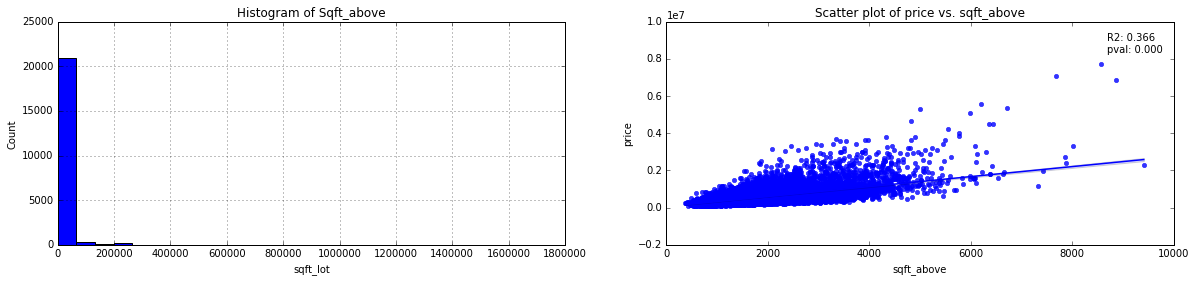

In [46]:
# ploting histogram and scatter plot

plt.subplot(121)
df.sqft_lot.hist(bins=25, figsize=(20,4))
plt.title('Histogram of Sqft_above')
plt.xlabel('sqft_lot')
plt.ylabel('Count');

plt.subplot(122)
r = smf.ols(formula='price ~ sqft_above', data=df).fit()

sns.regplot(x=df.sqft_above, y=df.price)
plt.title('Scatter plot of price vs. sqft_above')
text = 'R2: {:.3f}\npval: {:.3f}\n'.format(r.rsquared, r.pvalues[1])
plt.legend(title=text, frameon=False);

It is recognizable that we have a linear relation between `sqft_above` and `price`.

## Sqft_basement

No handles with labels found to put in legend.


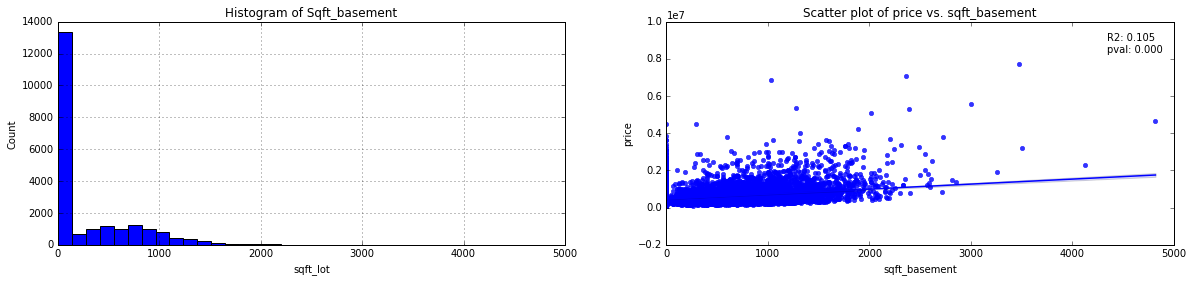

In [47]:
# ploting histogram and scatter plot

plt.subplot(121)
df.sqft_basement.hist(bins=35, figsize=(20,4))
plt.title('Histogram of Sqft_basement')
plt.xlabel('sqft_lot')
plt.ylabel('Count');

plt.subplot(122)
r = smf.ols(formula='price ~ sqft_basement', data=df).fit()

sns.regplot(x=df.sqft_basement, y=df.price)
plt.title('Scatter plot of price vs. sqft_basement')
text = 'R2: {:.3f}\npval: {:.3f}\n'.format(r.rsquared, r.pvalues[1])
plt.legend(title=text, frameon=False);

As alredy mentionend above we will add a dummy for `basement`. The Dummy variable should give us the information if a house has a basement (dummy variable = 1) or not (dummy variable = 0).

In [48]:
# add a dummy variable (1 or 0) for `basement`
basement = df.sqft_basement.copy()
basement[basement>0] = 1
basement.name = 'basement'
basement.head(5)

0    0.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: basement, dtype: float32

In [49]:
# add the dummy basement variable to our data set
df = pd.concat([df, basement], axis=1)
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_day,date_month,date_year,renovated,basement
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,13,10,2014,0.0,0.0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,9,12,2014,1.0,1.0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,25,2,2015,NaN,0.0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,9,12,2014,0.0,1.0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,18,2,2015,0.0,0.0


In [50]:
# now we can consider both `sqft_basement` and `basement`
smf.ols(formula='price ~ sqft_basement + C(basement)', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     1569.
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:43:10   Log-Likelihood:            -3.0591e+05
No. Observations:               21596   AIC:                         6.118e+05
Df Residuals:                   21593   BIC:                         6.119e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4.871e+05   2998.257    162.451      0.000    4.81e+05    4.93e+05
C(basement)[T.1.0] -1.946e+05   8337.622    -23.340      0.000   -2.11e+05   -1.78e+05
sqft_basement        444.5834      9.199     48.329      0.000     426.552     462.614
==============================================================================
Omnibus:                    17352.711   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           772399.256
Skew:                           3.540   Prob(JB):                         0.00
Kurtosis:                      31.430   Cond. No.                     1.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Floors

No handles with labels found to put in legend.


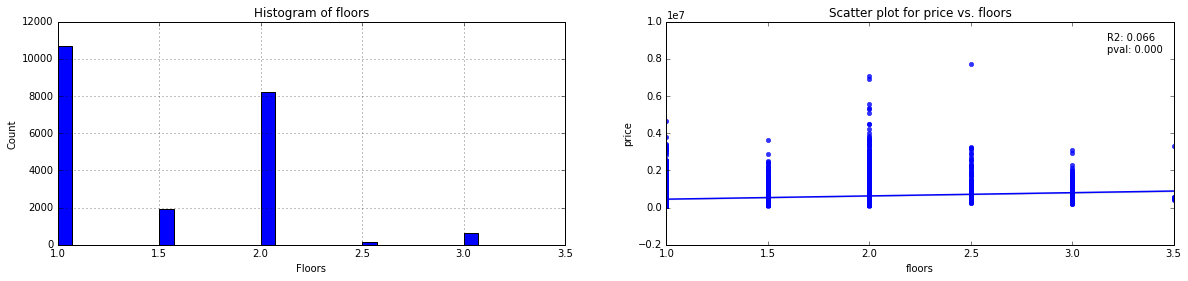

In [51]:
# ploting histogram and scatter plot

plt.subplot(121)
df.floors.hist(bins=35, figsize=(20,4))
plt.title('Histogram of floors')
plt.xlabel('Floors')
plt.ylabel('Count');

plt.subplot(122)
r = smf.ols(formula='price ~ floors', data=df).fit()

sns.regplot(x=df.floors, y=df.price)
plt.title('Scatter plot for price vs. floors')
text = 'R2: {:.3f}\npval: {:.3f}\n'.format(r.rsquared, r.pvalues[1])
plt.legend(title=text, frameon=False);

In [52]:
# create floors_dummy and add it to a new dataframe df_dummies

dummy_names = ['floor_dummy']
floors_dummy = pd.get_dummies(df.floors, prefix='floor', drop_first=True)
floors_dummy.columns = [x.replace('.', '_') for x in floors_dummy.columns]
floors_dummy.head(5)

,floor_1_5,floor_2_0,floor_2_5,floor_3_0,floor_3_5
0,0,0,0,0,0
1,0,1,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [53]:
# test regression model with categorical floors variable
smf.ols(formula='price ~ C(floors)', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     398.9
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:43:11   Log-Likelihood:            -3.0642e+05
No. Observations:               21596   AIC:                         6.129e+05
Df Residuals:                   21590   BIC:                         6.129e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.423e+05   3402.924    129.988      0.000    4.36e+05    4.49e+05
C(floors)[T.1.5]  1.167e+05   8733.945     13.362      0.000    9.96e+04    1.34e+05
C(floors)[T.2.0]  2.068e+05   5156.224     40.116      0.000    1.97e+05    2.17e+05
C(floors)[T.2.5]  6.187e+05   2.79e+04     22.164      0.000    5.64e+05    6.73e+05
C(floors)[T.3.0]  1.411e+05   1.46e+04      9.649      0.000    1.12e+05     1.7e+05
C(floors)[T.3.5]  4.679e+05   1.33e+05      3.520      0.000    2.07e+05    7.28e+05
==============================================================================
Omnibus:                    19214.032   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1216243.683
Skew:                           4.036   Prob(JB):                         0.00
Kurtosis:                      38.868   Cond. No.                         60.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After comparing both models we notice that `floor` as categorical variable have a higher R<sup>2</sup>  .

## Waterfront

No handles with labels found to put in legend.


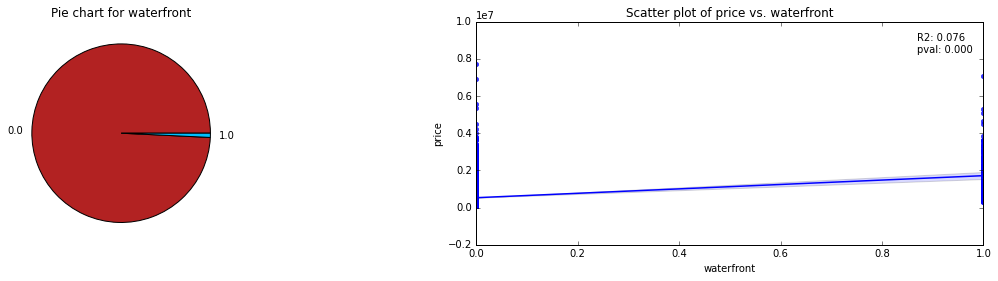

In [54]:
# ploting pie chart and scatter plot

plt.subplot(121)
df.waterfront.value_counts().plot(kind='pie', figsize=(20,4), colors=['firebrick','deepskyblue'])
plt.title('Pie chart for waterfront');
plt.ylabel('')

plt.subplot(122)
r = smf.ols(formula='price ~ waterfront', data=df).fit()

sns.regplot(x=df.waterfront, y=df.price)
plt.title('Scatter plot of price vs. waterfront')
text = 'R2: {:.3f}\npval: {:.3f}\n'.format(r.rsquared, r.pvalues[1])
plt.legend(title=text, frameon=False);

Since `waterfront` is a categorical variable, of course we will insert this as categorical variable in the regression model.

In [102]:
# create waterfront_dummy and add it later to the dataframe df_dummies

dummy_names.append('waterfront_dummy')
waterfront_dummy = pd.get_dummies(df.waterfront, prefix='waterfront', drop_first=True, dummy_na = True)
waterfront_dummy.columns = ['waterfront_1', 'waterfront_nan']
waterfront_dummy.head(5)

,waterfront_1,waterfront_nan
0,0,1
1,0,0
2,0,0
3,0,0
4,0,0


## View

No handles with labels found to put in legend.


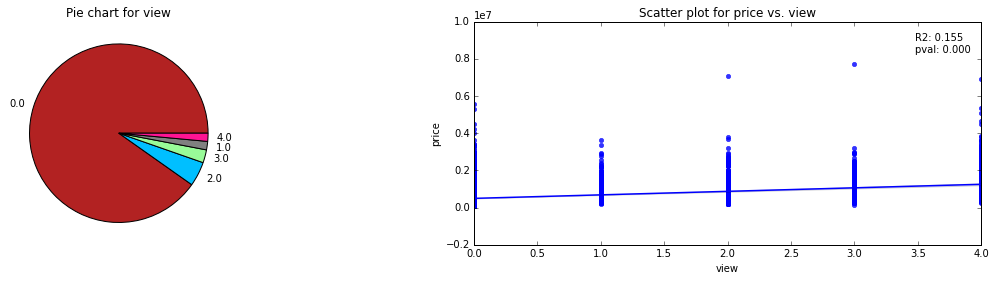

In [55]:
# ploting pie chart and scatter plot

plt.subplot(121)
df.view.value_counts().plot(kind='pie', figsize=(20,4), colors=['firebrick','deepskyblue', 'palegreen', 'gray', 'deeppink'])
plt.title('Pie chart for view');
plt.ylabel('')

plt.subplot(122)
r = smf.ols(formula='price ~ view', data=df).fit()

sns.regplot(x=df.view, y=df.price)
plt.title('Scatter plot for price vs. view')
text = 'R2: {:.3f}\npval: {:.3f}\n'.format(r.rsquared, r.pvalues[1])
plt.legend(title=text, frameon=False);

Since there is no clear linear relationship between `view` and `price`, we will also check the regression output for a model with view as cateogircal variable.

In [56]:
# test regression model with categorical view variable
smf.ols(formula='price ~ C(view)', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     1065.
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:43:14   Log-Likelihood:            -3.0543e+05
No. Observations:               21596   AIC:                         6.109e+05
Df Residuals:                   21591   BIC:                         6.109e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.972e+05   2405.606    206.685      0.000    4.92e+05    5.02e+05
C(view)[T.1.0]  3.162e+05   1.86e+04     16.962      0.000     2.8e+05    3.53e+05
C(view)[T.2.0]  2.942e+05   1.11e+04     26.461      0.000    2.72e+05    3.16e+05
C(view)[T.3.0]  4.761e+05   1.51e+04     31.547      0.000    4.47e+05    5.06e+05
C(view)[T.4.0]  9.553e+05    1.9e+04     50.244      0.000    9.18e+05    9.93e+05
==============================================================================
Omnibus:                    17954.697   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1079615.020
Skew:                           3.622   Prob(JB):                         0.00
Kurtosis:                      36.872   Cond. No.                         8.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we did it for `floors`.    
Comparing both models we notice that `view` as categorical variable have a higher R<sup>2</sup>.

In [57]:
# create view_dummy and add it later to the dataframe df_dummies (see above why we do this)

dummy_names.append('view_dummy')
view_dummy = pd.get_dummies(df.view, prefix='view', drop_first=True)
view_dummy.columns = [x.replace('.', '_') for x in view_dummy.columns]
view_dummy.head(5)

,view_1_0,view_2_0,view_3_0,view_4_0
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


## Condition

No handles with labels found to put in legend.


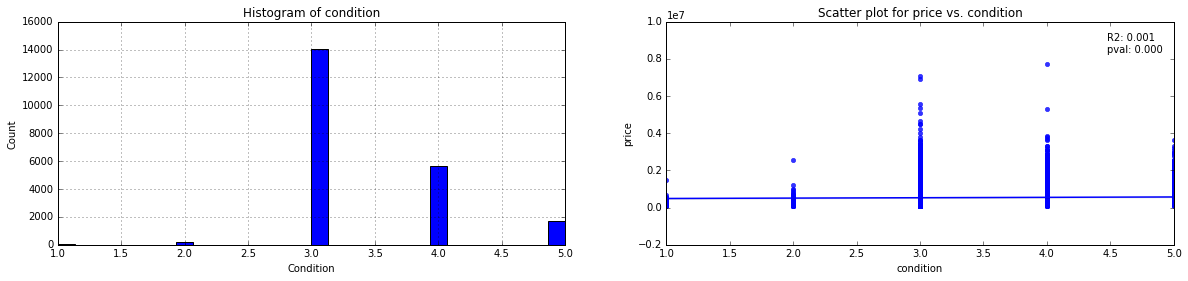

In [58]:
# ploting histogram and scatter plot

plt.subplot(121)
df.condition.hist(bins=30, figsize=(20,4))
plt.title('Histogram of condition')
plt.xlabel('Condition')
plt.ylabel('Count');

plt.subplot(122)
r = smf.ols(formula='price ~ condition', data=df).fit()

sns.regplot(x=df.condition, y=df.price)
plt.title('Scatter plot for price vs. condition')
text = 'R2: {:.3f}\npval: {:.3f}\n'.format(r.rsquared, r.pvalues[1])
plt.legend(title=text, frameon=False);

Since there is no clear linear relationship between `condition` and `price`, we will also check the regression output for a model with condition as cateogircal variable.

In [59]:
# test regression model with categorical condition variable
smf.ols(formula='price ~ C(condition)', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     36.84
Date:                Wed, 17 Feb 2021   Prob (F-statistic):           9.46e-31
Time:                        21:43:15   Log-Likelihood:            -3.0730e+05
No. Observations:               21596   AIC:                         6.146e+05
Df Residuals:                   21591   BIC:                         6.147e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          3.411e+05    6.8e+04      5.016      0.000    2.08e+05    4.74e+05
C(condition)[T.2] -1.289e+04   7.36e+04     -0.175      0.861   -1.57e+05    1.31e+05
C(condition)[T.3]  2.011e+05   6.81e+04      2.955      0.003    6.77e+04    3.35e+05
C(condition)[T.4]  1.803e+05   6.82e+04      2.645      0.008    4.67e+04    3.14e+05
C(condition)[T.5]  2.715e+05   6.86e+04      3.959      0.000    1.37e+05    4.06e+05
==============================================================================
Omnibus:                    19183.573   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1160631.779
Skew:                           4.043   Prob(JB):                         0.00
Kurtosis:                      37.992   Cond. No.                         75.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the results above, we will use `condition` as categorical variable in regression model.

## Grade

No handles with labels found to put in legend.


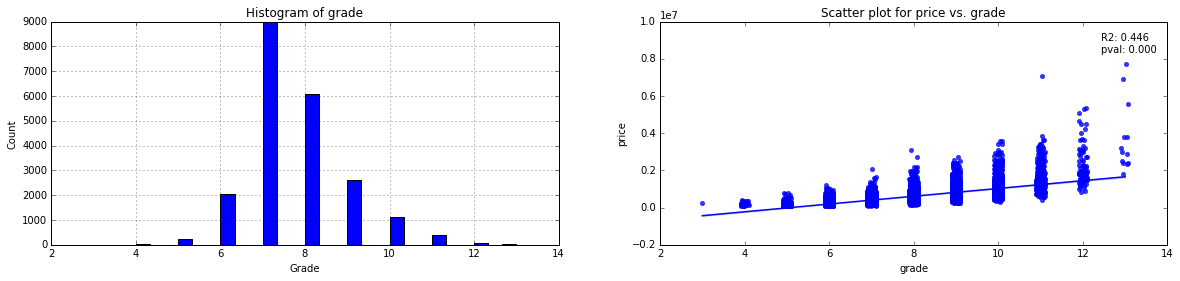

In [60]:
# ploting histogram and scatter plot

plt.subplot(121)
df.grade.hist(bins=30, figsize=(20,4))
plt.title('Histogram of grade')
plt.xlabel('Grade')
plt.ylabel('Count');

plt.subplot(122)
r = smf.ols(formula='price ~ grade', data=df).fit()

sns.regplot(x=df.grade, y=df.price, x_jitter=0.1)
plt.title('Scatter plot for price vs. grade')
text = 'R2: {:.3f}\npval: {:.3f}\n'.format(r.rsquared, r.pvalues[1])
plt.legend(title=text, frameon=False);

In [147]:
smf.ols(formula='price ~ grade', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.740e+04
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        08:15:15   Log-Likelihood:            -3.0100e+05
No. Observations:               21596   AIC:                         6.020e+05
Df Residuals:                   21594   BIC:                         6.020e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.061e+06   1.23e+04    -86.398      0.000   -1.09e+06   -1.04e+06
grade       2.092e+05   1585.811    131.897      0.000    2.06e+05    2.12e+05
==============================================================================
Omnibus:                    19879.380   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2043866.894
Skew:                           4.081   Prob(JB):                         0.00
Kurtosis:                      49.955   Cond. No.                         52.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The relationship between `grade` and `price`seems to be fit quite good for a linear relationship between both variables.   
<h2><span style="color:red"> 
Recommendation number TWO for our Stakeholders: </span> Increase the grade!</h2>

## Year_build

No handles with labels found to put in legend.


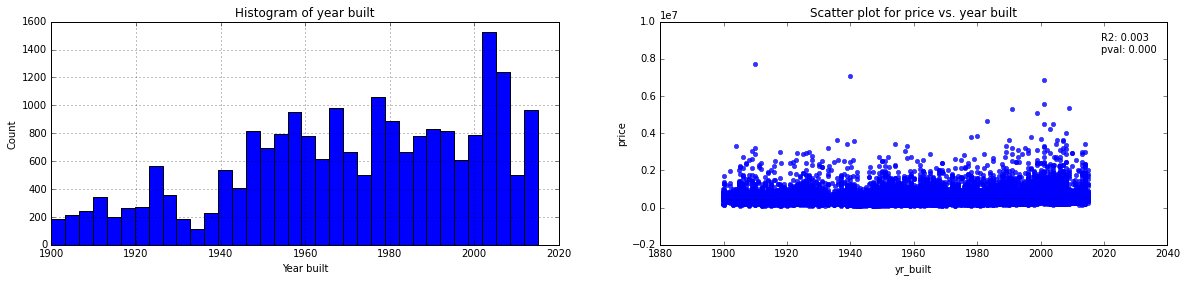

In [61]:
# ploting histogram and scatter plot

plt.subplot(121)
df.yr_built.hist(bins=35, figsize=(20,4))
plt.title('Histogram of year built')
plt.xlabel('Year built')
plt.ylabel('Count');

plt.subplot(122)
r = smf.ols(formula='price ~ yr_built', data=df).fit()

sns.regplot(x=df.yr_built, y=df.price, x_jitter=0.1)
plt.title('Scatter plot for price vs. year built')
text = 'R2: {:.3f}\npval: {:.3f}\n'.format(r.rsquared, r.pvalues[1])
plt.legend(title=text, frameon=False);

There is no clear linear relationship between `yr_built` and `price`.

## Year_renovated / Renovated

No handles with labels found to put in legend.


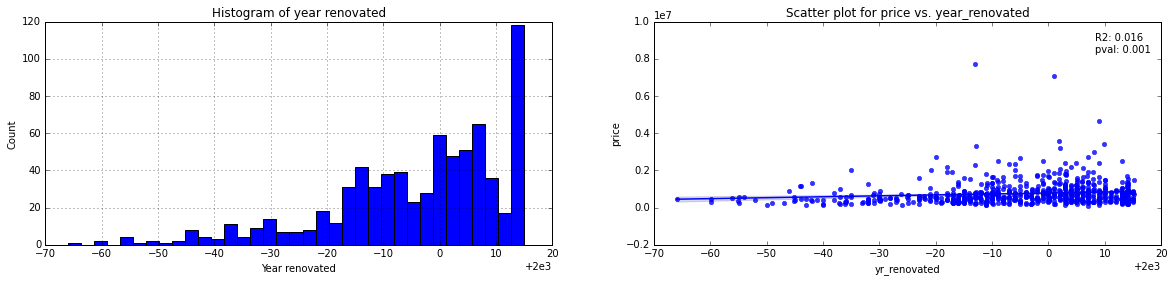

In [62]:
# ploting histogram and scatter plot

plt.subplot(121)
df[df.renovated==1].yr_renovated.hist(bins=35, figsize=(20,4))
plt.title('Histogram of year renovated')
plt.xlabel('Year renovated')
plt.ylabel('Count');

plt.subplot(122)
r = smf.ols(formula='price ~ yr_renovated', data=df[df.renovated==1]).fit()

sns.regplot(x=df[df.renovated==1].yr_renovated, y=df[df.renovated==1].price, x_jitter=0.1)
plt.title('Scatter plot for price vs. year_renovated')
text = 'R2: {:.3f}\npval: {:.3f}\n'.format(r.rsquared, r.pvalues[1])
plt.legend(title=text, frameon=False);

To be complet we will also include `renovated` - YES or NO (you remember that we added this to the data set).

No handles with labels found to put in legend.


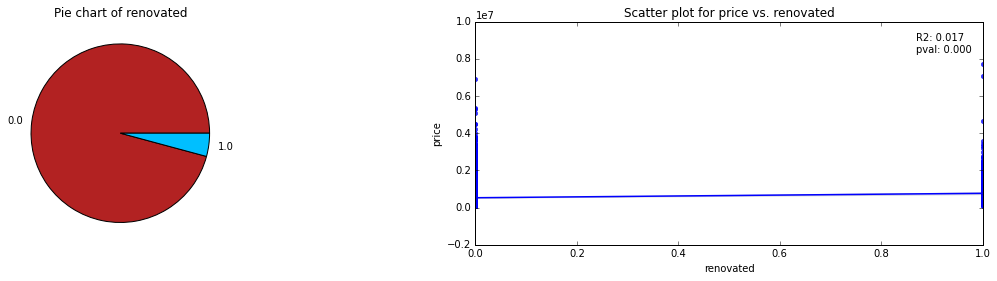

In [63]:
# ploting histogram and scatter plot

plt.subplot(121)
df.renovated.value_counts().plot(kind='pie', figsize=(20,4), colors=['firebrick','deepskyblue'])
plt.title('Pie chart of renovated');
plt.ylabel('')

plt.subplot(122)
r = smf.ols(formula='price ~ renovated', data=df).fit()

sns.regplot(x=df.renovated, y=df.price)
plt.title('Scatter plot for price vs. renovated')
text = 'R2: {:.3f}\npval: {:.3f}\n'.format(r.rsquared, r.pvalues[1])
plt.legend(title=text, frameon=False);

How are both fitting to each other? Let us go on by trying to find an answer to this question.
But before we do so we have many missing values for `yr_renovated` and `renovated`, that is way we construct a dummy variable.

In [88]:
# create renovated_dummy including a column for missing values and add it later to df_dummies

dummy_names.append('renovated_dummy')
renovated_dummy = pd.get_dummies(df.renovated, prefix='renov', drop_first=True, dummy_na = True)
renovated_dummy.columns = ['renovated_1', 'renovated_nan']
renovated_dummy.head(5)

,renovated_1,renovated_nan
0,0,0
1,1,0
2,0,1
3,0,0
4,0,0


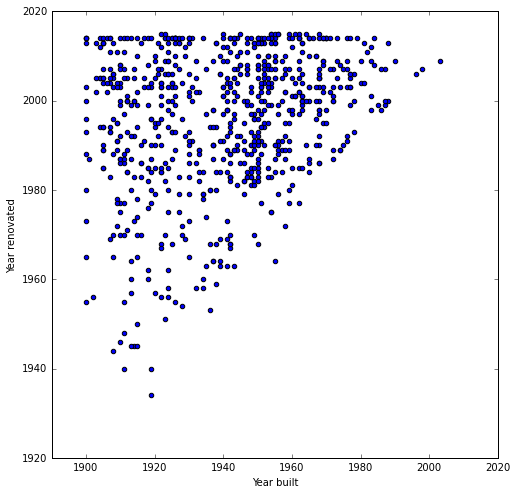

In [65]:
# checking how yr_renovated relates to yr_built (for all houses where yr_renovated > 0)

fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(df.yr_built[df.yr_renovated > 0], df.yr_renovated[df.yr_renovated > 0])
ax.ticklabel_format(useOffset=False)
plt.xlim(1890, 2020)
plt.ylim(1920, 2020);
plt.xlabel('Year built')
plt.ylabel('Year renovated');

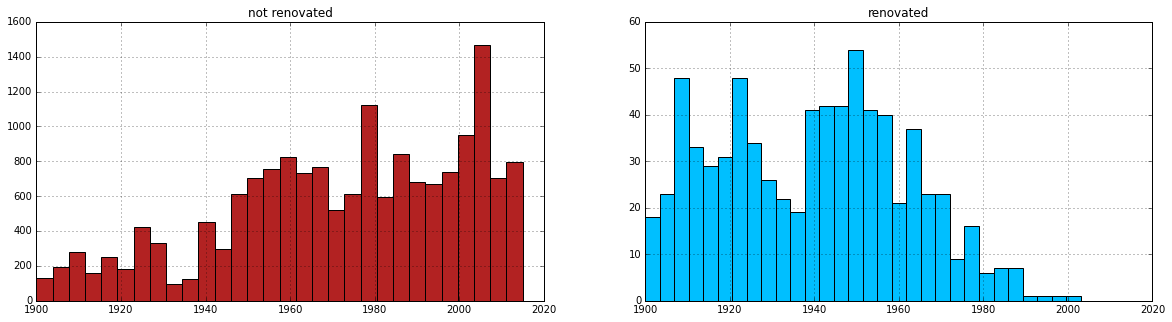

In [66]:
# checking the distribution of yr_built for all houses where yr_renovated no matter if zero or non-zero:

plt.subplot(121)
df.yr_built[df.yr_renovated == 0].hist(bins=30, figsize=(20,5), color='firebrick')
plt.title('not renovated')


plt.subplot(122)
df.yr_built[df.yr_renovated > 0].hist(bins=30, color='deepskyblue')
plt.title('renovated');

In [67]:
# checking the relationship between renovation status (yes/no) and price per decate:

# split the `year_built`variable into decades
decades = np.arange(1900, 2030, 10)
decade_built = pd.cut(df.yr_built, bins=decades, labels= [str(d) + "s" for d in decades[:-1]])
decade_built.name = 'built_in'
df = pd.concat([df, decade_built], axis=1)

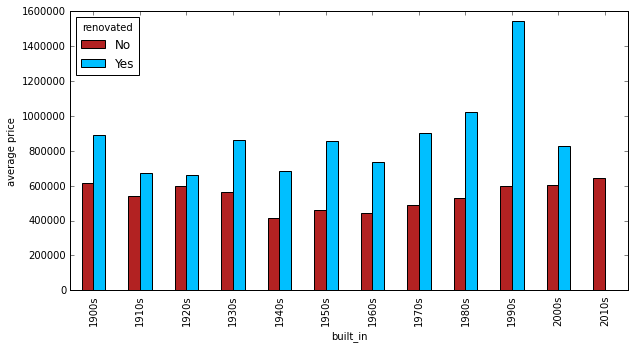

In [68]:
# pd.crosstab(df.decade_built, df.renovated, values=df.price, aggfunc=np.mean).plot(kind='bar')
pd.pivot_table(data=df, values='price', index='built_in', 
               columns='renovated', aggfunc=np.mean).plot(kind='bar', color=['firebrick','deepskyblue'], figsize=(10,5))
plt.ylabel('average price')
plt.legend(title='renovated', labels=['No','Yes'], loc='upper left');

In [69]:
# calculate mean price difference between renovated and non-renovated houses:
round(df.price[df.renovated==1].mean() - df.price[df.renovated==0].mean(),2)


238230.78

We can see that there is a significant price different between renovated and non-renovated houses: On average, renovated houses bring around 238 000 more than non-renovated houses.

<h2><span style="color:red"> 
Recommendation number THREE for our Stakeholders: </span>  Renovate the house!</h2><br>  
A little sidenote to that - We do not know the renovation costs!

## Zipcode

No handles with labels found to put in legend.


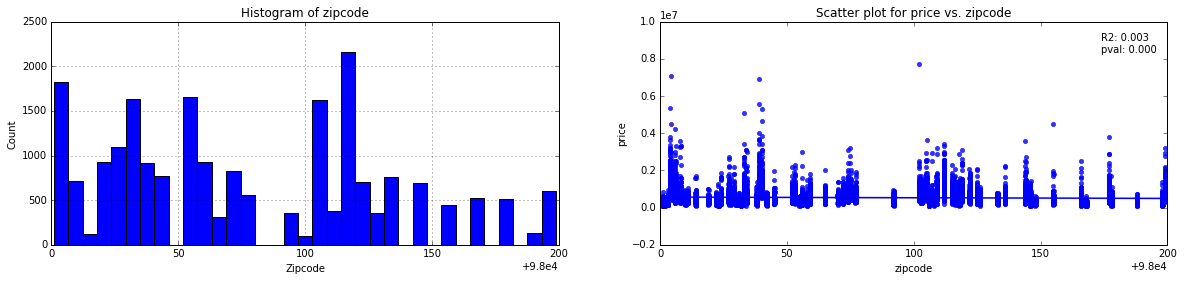

In [70]:
# ploting histogram and scatter plot

plt.subplot(121)
df.zipcode.hist(bins=35, figsize=(20,4))
plt.title('Histogram of zipcode')
plt.xlabel('Zipcode')
plt.ylabel('Count');

plt.subplot(122)
r = smf.ols(formula='price ~ zipcode', data=df).fit()

sns.regplot(x=df.zipcode, y=df.price, x_jitter=0.1)
plt.title('Scatter plot for price vs. zipcode')
text = 'R2: {:.3f}\npval: {:.3f}\n'.format(r.rsquared, r.pvalues[1])
plt.legend(title=text, frameon=False);

The variable `zipcode` is a categorical variable and will be included to the regression model.

In [71]:
smf.ols(formula='price ~ C(zipcode)', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     214.3
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:43:21   Log-Likelihood:            -3.0173e+05
No. Observations:               21596   AIC:                         6.036e+05
Df Residuals:                   21526   BIC:                         6.042e+05
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2.812e+05   1.49e+04     18.859      0.000    2.52e+05     3.1e+05
C(zipcode)[T.98002] -4.691e+04    2.5e+04     -1.876      0.061   -9.59e+04    2115.031
C(zipcode)[T.98003]  1.292e+04   2.26e+04      0.573      0.567   -3.13e+04    5.71e+04
C(zipcode)[T.98004]  1.075e+06   2.18e+04     49.314      0.000    1.03e+06    1.12e+06
C(zipcode)[T.98005]  5.291e+05   2.65e+04     19.997      0.000    4.77e+05    5.81e+05
C(zipcode)[T.98006]  5.787e+05   1.96e+04     29.554      0.000     5.4e+05    6.17e+05
C(zipcode)[T.98007]  3.361e+05   2.81e+04     11.945      0.000    2.81e+05    3.91e+05
C(zipcode)[T.98008]  3.644e+05   2.25e+04     16.203      0.000     3.2e+05    4.09e+05
C(zipcode)[T.98010]  1.425e+05    3.2e+04      4.450      0.000    7.97e+04    2.05e+05
C(zipcode)[T.98011]  2.092e+05   2.52e+04      8.308      0.000     1.6e+05    2.59e+05
C(zipcode)[T.98014]  1.744e+05   2.95e+04      5.915      0.000    1.17e+05    2.32e+05
C(zipcode)[T.98019]  1.436e+05   2.54e+04      5.656      0.000    9.39e+04    1.93e+05
C(zipcode)[T.98022]  3.555e+04   2.38e+04      1.493      0.135   -1.11e+04    8.22e+04
C(zipcode)[T.98023]  5547.9418   1.96e+04      0.283      0.777   -3.28e+04    4.39e+04
C(zipcode)[T.98024]  3.049e+05    3.5e+04      8.710      0.000    2.36e+05    3.74e+05
C(zipcode)[T.98027]  3.359e+05   2.04e+04     16.445      0.000    2.96e+05    3.76e+05
C(zipcode)[T.98028]  1.813e+05   2.25e+04      8.060      0.000    1.37e+05    2.25e+05
C(zipcode)[T.98029]  3.314e+05   2.17e+04     15.251      0.000    2.89e+05    3.74e+05
C(zipcode)[T.98030]  1.499e+04   2.31e+04      0.648      0.517   -3.04e+04    6.04e+04
C(zipcode)[T.98031]  1.915e+04   2.27e+04      0.843      0.399   -2.54e+04    6.37e+04
C(zipcode)[T.98032]  -2.99e+04   2.94e+04     -1.017      0.309   -8.75e+04    2.77e+04
C(zipcode)[T.98033]  5.228e+05   2.02e+04     25.879      0.000    4.83e+05    5.62e+05
C(zipcode)[T.98034]  2.405e+05   1.92e+04     12.513      0.000    2.03e+05    2.78e+05
C(zipcode)[T.98038]   8.59e+04   1.89e+04      4.536      0.000    4.88e+04    1.23e+05
C(zipcode)[T.98039]   1.88e+06   4.27e+04     43.981      0.000     1.8e+06    1.96e+06
C(zipcode)[T.98040]  9.137e+05   2.25e+04     40.581      0.000     8.7e+05    9.58e+05
C(zipcode)[T.98042]  3.039e+04   1.92e+04      1.582      0.114   -7268.181     6.8e+04
C(zipcode)[T.98045]   1.59e+05   2.42e+04      6.564      0.000    1.12e+05    2.07e+05
C(zipcode)[T.98052]   3.64e+05    1.9e+04     19.130      0.000    3.27e+05    4.01e+05
C(zipcode)[T.98053]   3.96e+05   2.05e+04     19.290      0.000    3.56e+05    4.36e+05
C(zipcode)[T.98055]  2.307e+04   2.28e+04      1.010      0.313   -2.17e+04    6.78e+04
C(zipcode)[T.98056]  1.397e+05   2.05e+04      6.817      0.000    9.95e+04     1.8e+05
C(z

The feature `zipcode` explaines already around 40% of the variance in `price`, hence we should definitely include this variable in the final regression model.    
<h2><span style="color:red"> 
Recommendation number FOUR for our Stakeholders: </span> Location! Location! Location is key!</h2>

In [72]:
# create zip_dummy and add it later to the dataframe df_dummies (see above why we do this)
dummy_names.append('zip_dummy')
zip_dummy = pd.get_dummies(df.zipcode, prefix='zip', drop_first=True)
zip_dummy.head(5)

,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Latitude & Longitude

No handles with labels found to put in legend.


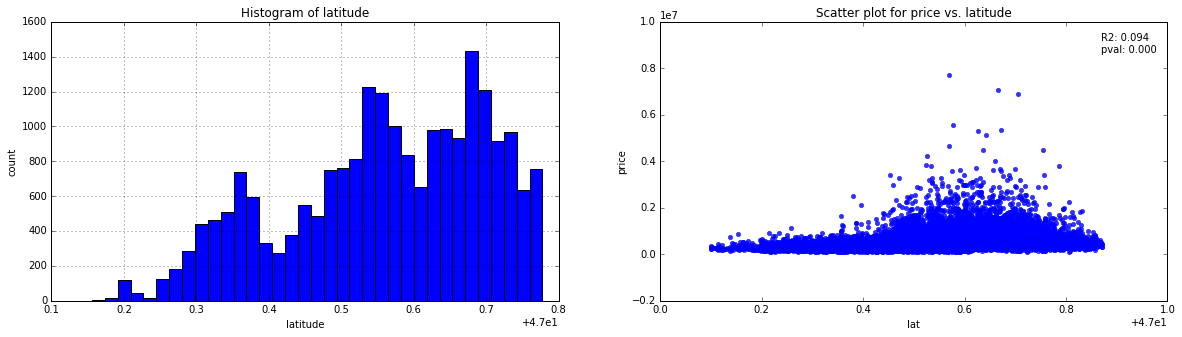

In [73]:
# ploting histogram and scatter for latitude

plt.subplot(121)
df.lat.hist(bins=35, figsize=(20,5))
plt.title('Histogram of latitude')
plt.xlabel('latitude')
plt.ylabel('count');

plt.subplot(122)
r = smf.ols(formula='price ~ lat', data=df).fit()

sns.regplot(x=df.lat, y=df.price, x_jitter=0.1)
plt.title('Scatter plot for price vs. latitude')
text = 'R2: {:.3f}\npval: {:.3f}\n'.format(r.rsquared, r.pvalues[1])
plt.legend(title=text, frameon=False);

No handles with labels found to put in legend.


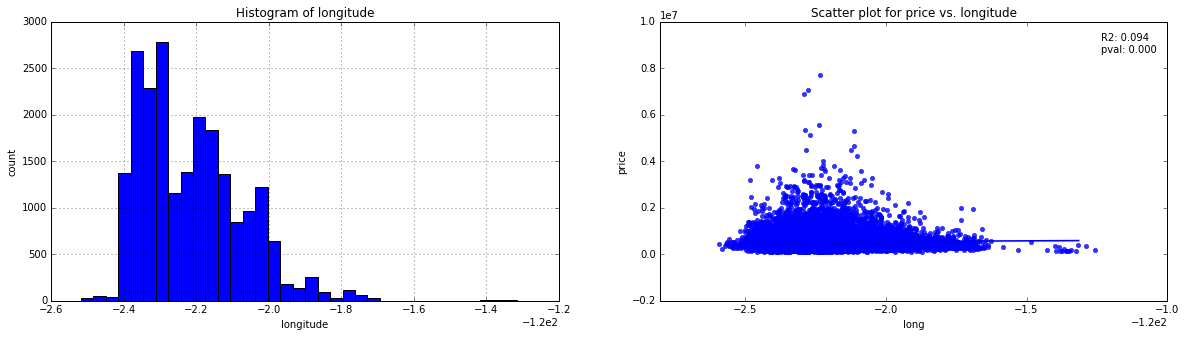

In [74]:
# ploting histogram and scatter for longitude

plt.subplot(121)
df.long.hist(bins=35, figsize=(20,5))
plt.title('Histogram of longitude')
plt.xlabel('longitude')
plt.ylabel('count');

plt.subplot(122)
r = smf.ols(formula='price ~ lat', data=df).fit()

sns.regplot(x=df.long, y=df.price, x_jitter=0.1)
plt.title('Scatter plot for price vs. longitude')
text = 'R2: {:.3f}\npval: {:.3f}\n'.format(r.rsquared, r.pvalues[1])
plt.legend(title=text, frameon=False);

Conclusion: No clear linear relationship between `lat` or `long` with `price`.

## Sqft_living15 and sqft_lot15

No handles with labels found to put in legend.


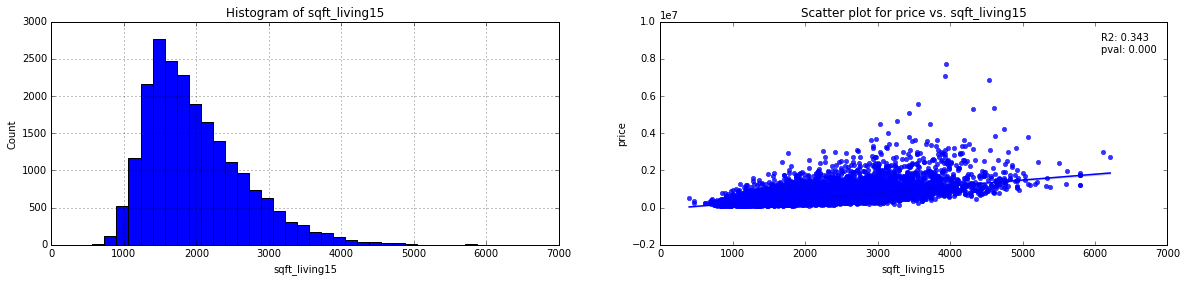

In [75]:
# ploting histogram and scatter for sqft_living15

plt.subplot(121)
df.sqft_living15.hist(bins=35, figsize=(20,4))
plt.title('Histogram of sqft_living15')
plt.xlabel('sqft_living15')
plt.ylabel('Count');

plt.subplot(122)
r = smf.ols(formula='price ~ sqft_living15', data=df).fit()

sns.regplot(x=df.sqft_living15, y=df.price, x_jitter=0.1)
plt.title('Scatter plot for price vs. sqft_living15')
text = 'R2: {:.3f}\npval: {:.3f}\n'.format(r.rsquared, r.pvalues[1])
plt.legend(title=text, frameon=False);

The variable `sqft_living` shows a slight linear relationship with `price`, we can include it in the model as a linear predictor.

No handles with labels found to put in legend.


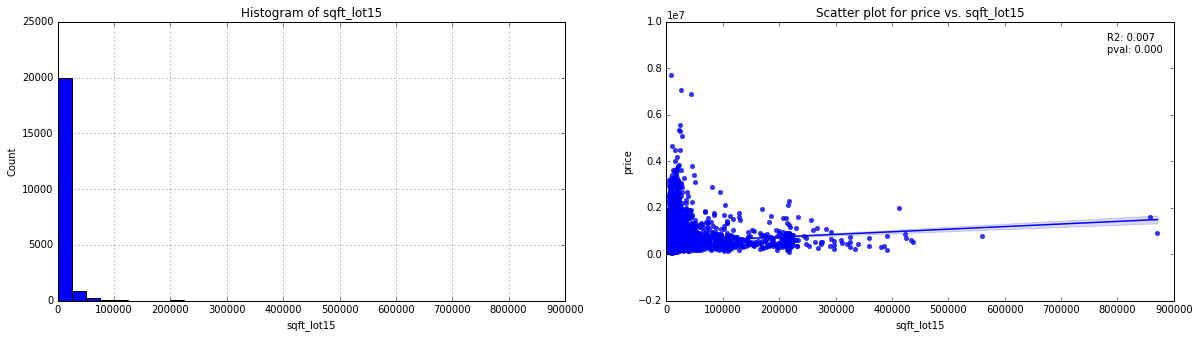

In [76]:
# ploting histogram and scatter for sqft_lot15

plt.subplot(121)
df.sqft_lot15.hist(bins=35, figsize=(20,5))
plt.title('Histogram of sqft_lot15')
plt.xlabel('sqft_lot15')
plt.ylabel('Count');

plt.subplot(122)
r = smf.ols(formula='price ~ sqft_lot15', data=df).fit()

sns.regplot(x=df.sqft_lot15, y=df.price, x_jitter=0.1)
plt.title('Scatter plot for price vs. sqft_lot15')
text = 'R2: {:.3f}\npval: {:.3f}\n'.format(r.rsquared, r.pvalues[1])
plt.legend(title=text, frameon=False);

The feature `sqft_living` does not show a clear linear relationship with `price`, we might bin it and include it in the model as a categorical predictor.

## Date sold (day, month, year)

No handles with labels found to put in legend.


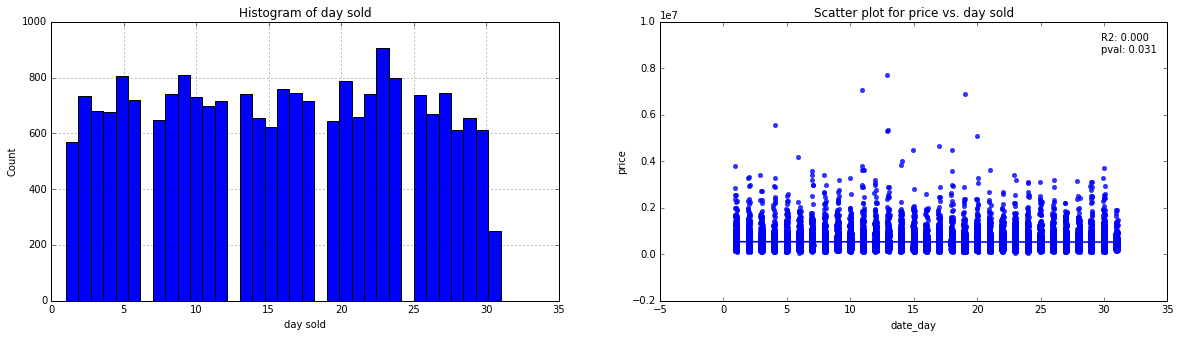

In [77]:
# ploting histogram and scatter for date_day

plt.subplot(121)
df.date_day.hist(bins=35, figsize=(20,5))
plt.title('Histogram of day sold')
plt.xlabel('day sold')
plt.ylabel('Count');

plt.subplot(122)
r = smf.ols(formula='price ~ date_day', data=df).fit()

sns.regplot(x=df.date_day, y=df.price, x_jitter=0.1)
plt.title('Scatter plot for price vs. day sold')
text = 'R2: {:.3f}\npval: {:.3f}\n'.format(r.rsquared, r.pvalues[1])
plt.legend(title=text, frameon=False);

We can see no clear linear relationship between `date_day` and `price`. (We could consider either including `date_day` as a categorical variable, or to group it into, say, weekdays (Mo-Sa) or start/middle/end of a month and then use this as a categorical predictor.)

No handles with labels found to put in legend.


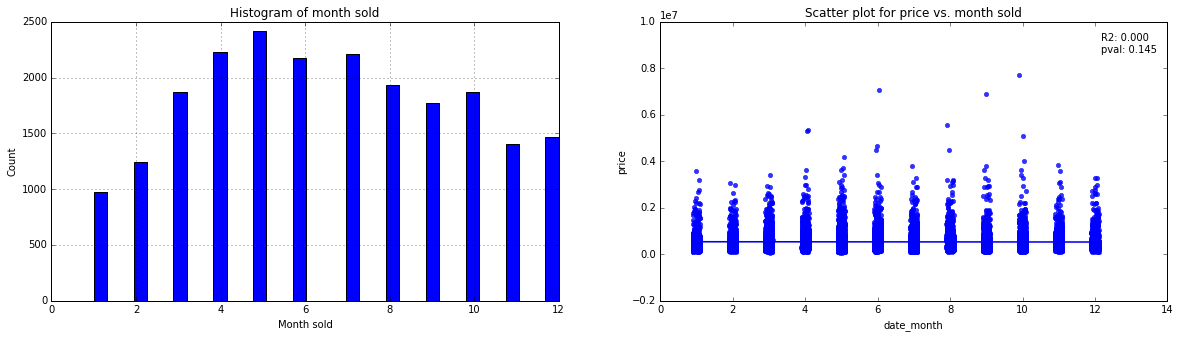

In [78]:
#  ploting histogram and scatter for date_month

plt.subplot(121)
df.date_month.hist(bins=35, figsize=(20,5))
plt.title('Histogram of month sold')
plt.xlabel('Month sold')
plt.ylabel('Count');

plt.subplot(122)
r = smf.ols(formula='price ~ date_month', data=df).fit()

sns.regplot(x=df.date_month, y=df.price, x_jitter=0.1)
plt.title('Scatter plot for price vs. month sold')
text = 'R2: {:.3f}\npval: {:.3f}\n'.format(r.rsquared, r.pvalues[1])
plt.legend(title=text, frameon=False);

We can also see no clear linear relationship between `date_month` and `price`. (We could consider either including `date_month` as a categorical variable, or to group it into, say, seasons (spring, summer, autumn, winter) and then use this as a categorical predictor.)

No handles with labels found to put in legend.


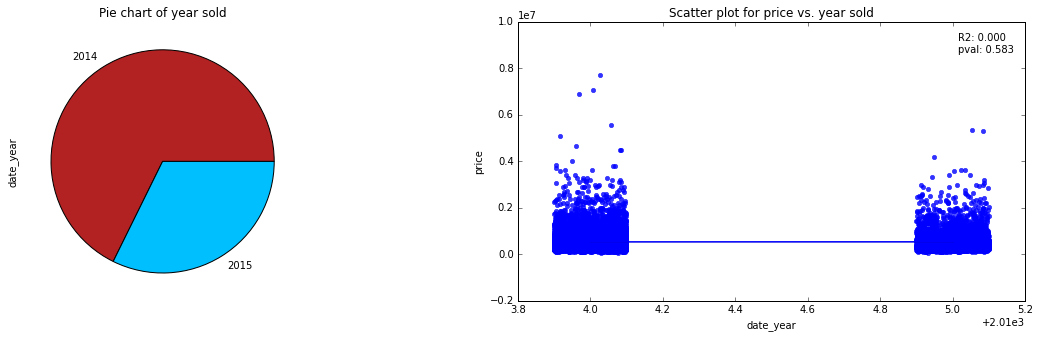

In [79]:
#  ploting histogram and scatter for date_year

plt.subplot(121)
df.date_year.value_counts().plot(kind='pie', colors=['firebrick','deepskyblue'], figsize=(20,5))
plt.title('Pie chart of year sold');

plt.subplot(122)
r = smf.ols(formula='price ~ date_year', data=df).fit()

sns.regplot(x=df.date_year, y=df.price, x_jitter=0.1)
plt.title('Scatter plot for price vs. year sold')
text = 'R2: {:.3f}\npval: {:.3f}\n'.format(r.rsquared, r.pvalues[1])
plt.legend(title=text, frameon=False);

We can see no influence of `date_year` on `price`, we will likely leave this feature out of the regression.

## Head map

Now we take a look on the correlation of each varaible with price. This will give us a much better option to identify the highly correlated variables. To do this we have to creat a new data set that contains only numerical data. Also only those will used for our head map.

In [80]:
# all columns of data set
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'date_day', 'date_month',
       'date_year', 'renovated', 'basement', 'built_in'],
      dtype='object')

In [81]:
# numerical variables (these will be used for the heatmap)
df_heatmap = df[['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 
             'sqft_basement', 'grade', 'yr_renovated', 
             'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_built']].copy()
df_heatmap.head(5)

,price,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,grade,yr_renovated,lat,long,sqft_living15,sqft_lot15,yr_built
0,221900.0,1.00,1180,5650,1180,0.0,7,0.0,47.5112,-122.257,1340,5650,1955
1,538000.0,2.25,2570,7242,2170,400.0,7,1991.0,47.7210,-122.319,1690,7639,1951
2,180000.0,1.00,770,10000,770,0.0,6,NaN,47.7379,-122.233,2720,8062,1933
3,604000.0,3.00,1960,5000,1050,910.0,7,0.0,47.5208,-122.393,1360,5000,1965
4,510000.0,2.00,1680,8080,1680,0.0,8,0.0,47.6168,-122.045,1800,7503,1987


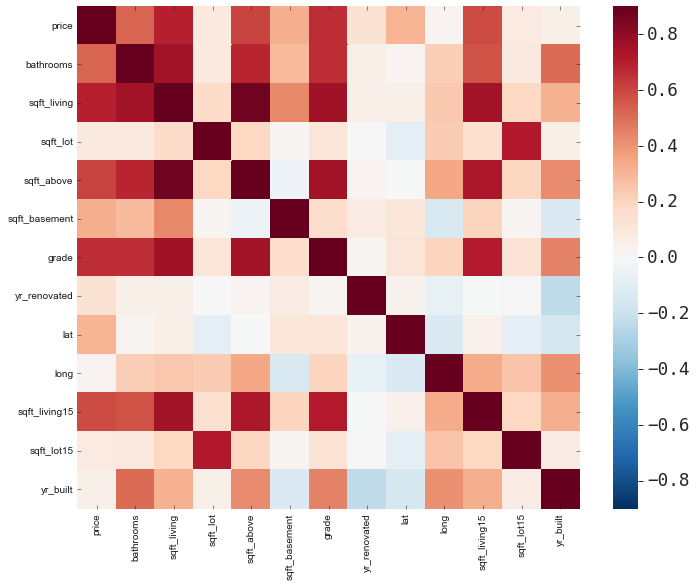

In [82]:
# Correlation matrix (heat map)

# calculate the correaltion matrix in numbers
corrmat = df_heatmap.corr()  

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Drawing the heatmap using seaborn (vmax/vmin: Values to anchor the colormap; square: shape of cells)
sns.set(context="paper", font="monospace", font_scale=2)
sns.heatmap(corrmat, vmax=.9, vmin=-.9, cmap = 'RdBu_r', square=True, annot_kws={'size': 14}); 

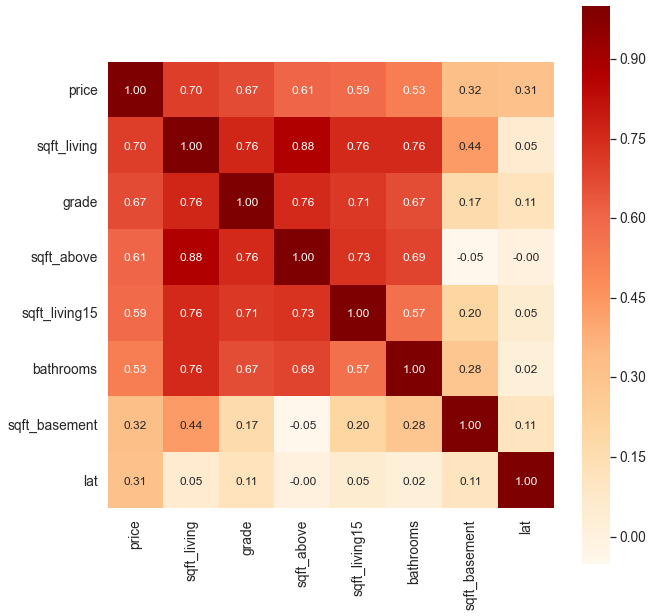

In [83]:
# price correlation matrix with only k variables for heatmap (K-map method = Karnaugh Maps)
k = 8
cols = corrmat.nlargest(k, 'price').index   # return k columns with largest correlation with SalePries
corrmat_k = df[cols].corr()
sns.set(font_scale=1.25)
cmap = sns.cubehelix_palette(8)
plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat_k, fmt='.2f', annot=True, cmap = 'OrRd', square=True, annot_kws={'size': 12});

In [84]:
# we should keep in mind  these numerical variables that correlate highest with price for the regression:
largest_corr = list(corrmat_k.columns[1:6])
largest_corr

['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']

---
# IV. Multiple Regression Model

In [85]:
# Step 1: select numerical variables used for regression and mean-center them

df_num = df[largest_corr].copy()
df_num = df_num.apply(lambda x: x-x.mean())
    
# df_num.drop('sqft_living', axis=1, inplace=True)
df_num.head(10)

,sqft_living,grade,sqft_above,sqft_living15,bathrooms
0,-900.343165,-0.657946,-608.631506,-646.650722,-1.115843
1,489.656835,-0.657946,381.368494,-296.650722,0.134157
2,-1310.343165,-1.657946,-1018.631506,733.349278,-1.115843
3,-120.343165,-0.657946,-738.631506,-626.650722,0.884157
4,-400.343165,0.342054,-108.631506,-186.650722,-0.115843
5,3339.656835,3.342054,2101.368494,2773.349278,2.384157
6,-365.343165,-0.657946,-73.631506,251.349278,0.134157
7,-1020.343165,-0.657946,-728.631506,-336.650722,-0.615843
8,-300.343165,-0.657946,-738.631506,-206.650722,-1.115843
9,-190.343165,-0.657946,101.368494,403.349278,0.384157


In [100]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_day,date_month,date_year,renovated,basement,built_in
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,13,10,2014,0.0,0.0,1950s
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,9,12,2014,1.0,1.0,1950s
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,25,2,2015,NaN,0.0,1930s
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,9,12,2014,0.0,1.0,1960s
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,18,2,2015,0.0,0.0,1980s


In [103]:
# Step 2: select categorical variables used for regression (not mean-centered)

df_cat = pd.concat([basement, waterfront_dummy, floors_dummy, view_dummy, renovated_dummy, zip_dummy], axis=1)
df_cat.head(5)

,basement,waterfront_1,waterfront_nan,floor_1_5,floor_2_0,floor_2_5,floor_3_0,floor_3_5,view_1_0,view_2_0,view_3_0,view_4_0,waterfront_1,waterfront_nan,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [104]:
# Step 3: Combine the selected numerical and categorical variables and do a multiple regression

X = pd.concat([df_num, df_cat], axis=1)
X = sm.add_constant(X)
y = df.price

sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     1023.
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        22:01:58   Log-Likelihood:            -2.8981e+05
No. Observations:               21596   AIC:                         5.798e+05
Df Residuals:                   21509   BIC:                         5.805e+05
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3.655e+05   8879.023     41.163      0.000    3.48e+05    3.83e+05
sqft_living      144.8546      4.930     29.382      0.000     135.191     154.518
grade            5.53e+04   1766.171     31.310      0.000    5.18e+04    5.88e+04
sqft_above        53.2221      5.659      9.404      0.000      42.129      64.315
sqft_living15     12.4386      2.931      4.244      0.000       6.694      18.184
bathrooms       1.111e+04   2527.196      4.395      0.000    6153.207    1.61e+04
basement       -3.083e+04   4343.863     -7.098      0.000   -3.93e+04   -2.23e+04
waterfront_1    3.072e+05   8396.002     36.590      0.000    2.91e+05    3.24e+05
waterfront_nan  -931.6072   1778.044     -0.524      0.600   -4416.706    2553.492
floor_1_5      -2.029e+04   4373.844     -4.640      0.000   -2.89e+04   -1.17e+04
floor_2_0      -7.404e+04   3549.716    -20.858      0.000    -8.1e+04   -6.71e+04
floor_2_5       3.597e+04   1.36e+04      2.649      0.008    9354.872    6.26e+04
floor_3_0      -1.331e+05   7848.590    -16.957      0.000   -1.48e+05   -1.18e+05
floor_3_5      -7764.2332   6.19e+04     -0.125      0.900   -1.29e+05    1.14e+05
view_1_0        8.561e+04   9283.206      9.222      0.000    6.74e+04    1.04e+05
view_2_0        7.773e+04   5658.339     13.737      0.000    6.66e+04    8.88e+04
view_3_0        1.711e+05   7734.868     22.120      0.000    1.56e+05    1.86e+05
view_4_0        3.539e+05   1.17e+04     30.339      0.000    3.31e+05    3.77e+05
waterfront_1    3.072e+05   8396.002     36.590      0.000    2.91e+05    3.24e+05
waterfront_nan  -931.6072   1778.044     -0.524      0.600   -4416.706    2553.492
zip_98002       3.899e+04   1.44e+04      2.701      0.007    1.07e+04    6.73e+04
zip_98003      -1.107e+04    1.3e+04     -0.851      0.395   -3.66e+04    1.44e+04
zip_98004       7.909e+05   1.27e+04     62.141      0.000    7.66e+05    8.16e+05
zip_98005       3.133e+05   1.54e+04     20.375      0.000    2.83e+05    3.43e+05
zip_98006       2.787e+05   1.15e+04     24.242      0.000    2.56e+05    3.01e+05
zip_98007       2.507e+05   1.62e+04     15.442      0.000    2.19e+05    2.83e+05
zip_98008       2.524e+05    1.3e+04     19.409      0.000    2.27e+05    2.78e+05
zip_98010       8.497e+04   1.85e+04      4.605      0.000    4.88e+04    1.21e+05
zip_98011       1.243e+05   1.45e+04      8.552      0.000    9.58e+04    1.53e+05
zip_98014       1.207e+05    1.7e+04      7.104      0.000    8.74e+04    1.54e+05
zip_98019       9.528e+04   1.47e+04      6.502      0.000    6.66e+04    1.24e+05
zip_98022       1.352e+04   1.38e+04      0.981      0.326   -1.35e+04    4.05e+04
zip_98023      -3.055e+04   1.13e+04     -2.705      0.007   -5.27e+04   -8412.468
zip_98024       1.822e+05   2.02e+04      9.021      0.000    1.43e+05    2.22e+05
zip_98027   

In [146]:
results = sm.OLS(y, X).fit()
results.save("KCH_Multiple_Regression_Model.pickle")

# V. Modeling by using Sklearn

In [121]:
X = pd.concat([df_num, df_cat], axis=1)

y = df.price

In [122]:
# splitting the data set into test data (20%) and train data (80%) 

X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size=0.2, random_state=105, shuffle=False)
print('X_Training:', X_training.shape[0],'X_Testing:', X_testing.shape[0])
print('y_Training:', y_training.shape[0],'y_Testing:', y_testing.shape[0])

X_Training: 17276 X_Testing: 4320
y_Training: 17276 y_Testing: 4320


In [138]:
model_sk = LinearRegression()
model_sk.fit(X_training,y_training)

LinearRegression()

In [139]:
y_price_prediction = model_sk.predict(X_testing)
y_price_prediction

array([572560.33216593, 361349.88215592, 309901.78788116, ...,
       359191.44320202, 390824.19074884, 359191.44320202])

In [142]:
# Root mean squared error (RMSE)

print('Root Mean squared error (RMSE): %.2f'
      % mean_squared_error(y_price_prediction, y_testing, squared = False))

# r**2

print('R**2: %.2f'
      % r2_score(y_testing, y_price_prediction))

Root Mean squared error (RMSE): 162921.32
R**2: 0.81


# VI. Summary

**Conclusions:**
- several variables were found with a significant impact on house selling prices in King County
- most important ones: location (zipcode), total living area, renovation status and house grade
- using these and further features in a multiple regression model, these predictors could together explain **>80%** of sales prices in King County

**Recommendations** (to increase sales price):

**1) Increase the interior living area of the house** Find the right location** 

**2) Find the right location** 

**3) Renovate the house** 

**4) Increase the grade of the house** 